<a href="https://colab.research.google.com/github/semteul/2025-1_CV/blob/main/CV_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2022078073 김민석

# 사전 설정

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

DIR = "/content/drive/MyDrive/25-1/cv/"

Mounted at /content/drive


# HW#2-1

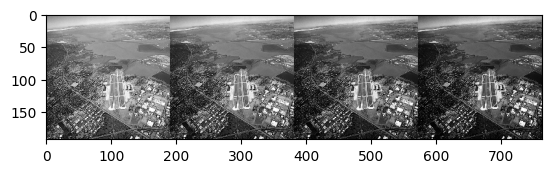

In [2]:
img = cv.imread(DIR+"Fig0309(a)(washed_out_aerial_image).tif")
img = cv.resize(img,dsize=(0,0),fx=0.25,fy=0.25)

def gamma(f, gamma=1.0):
  f1=f/255.0
  return np.uint8(255*(f1**gamma))

gc = np.hstack((gamma(img,3),gamma(img,4),gamma(img,5),gamma(img,6)))

plt.imshow(cv.cvtColor(gc, cv.COLOR_BGR2RGB))

결과 : 감마값이 강할수록 화면이 전체적으로 더 어두워진다.

# HW#2-2

Piecewise-Linear Transformation을 적용시키기 위한 함수

In [3]:
def linear(p, r1, s1, r2, s2):
    if p < r1:
        return p * (s1 / r1)
    elif p <= r2:
        return s1 + (p - r1) * (s2 - s1) / (r2 - r1)
    else:
        return s2 + (p - r2) * (1 - s2) / (1 - r2)

In [4]:
r1, s1 = 0.3, 0.1
r2, s2 = 0.7, 0.9

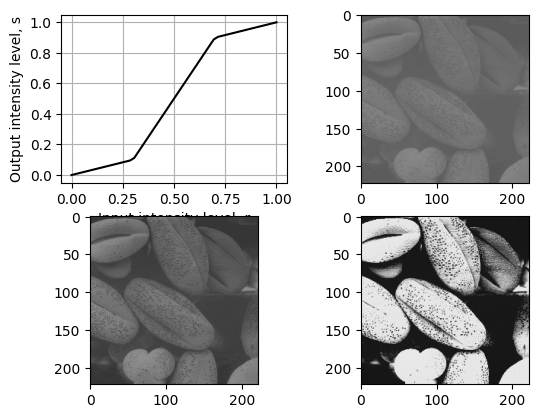

In [5]:
x_vals = np.linspace(0,1)
y_vals = [linear(p, r1, s1, r2, s2) for p in x_vals]

plt.subplot(2, 2, 1)
plt.plot(x_vals, y_vals, color='black')
plt.xlabel("Input intensity level, r")
plt.ylabel("Output intensity level, s")
plt.grid(True)

img = cv.imread(DIR+"Fig0310(b)(washed_out_pollen_image).tif", )
img = cv.resize(img,dsize=(0,0),fx=0.25,fy=0.25)

plt.subplot(2, 2, 2)
# 원본 사진
plt.imshow(img)

# 실제 image를 linear함수를 이용해 변환
def transform(img):
  h, w, c = img.shape
  result = np.zeros((h, w, c), dtype=np.uint8)

  for i in range(h):
      for j in range(w):
          for k in range(c):
              p = float(img[i, j, k]) / 255
              result[i, j, k] = int(linear(p, r1, s1, r2, s2) * 255)
  return result


#
plt.subplot(2, 2, 3)
plt.imshow(transform(img))


# 문턱값에 대해 미세 조정 실시 후 출력
r1, s1 = 0.4, 0.1
r2, s2 = 0.45, 0.9

plt.subplot(2, 2, 4)
plt.imshow(transform(img))

# HW#2-3

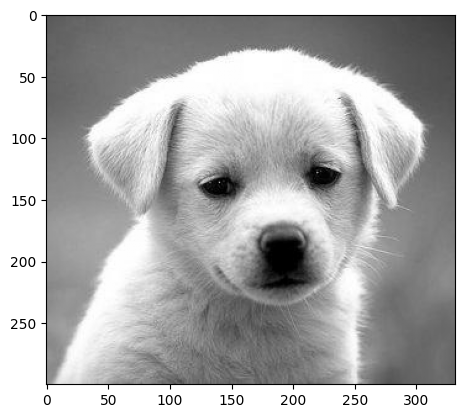

In [64]:
# 예시 이미지 불러오기
puppy = cv.imread(DIR+"puppy.jpg")
gray =cv.cvtColor(puppy,cv.COLOR_BGR2GRAY)
gray16 = np.int16(gray)

plt.imshow(gray, cmap='gray')

In [7]:
# 이미지에 컨볼루션 적용 함수
def conv(img, filter):
    return np.uint8(np.clip(cv.filter2D(img, -1, filter), 0, 255))

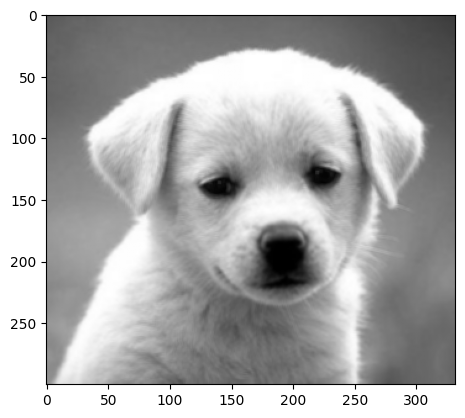

In [8]:
# 1. 평균 필터, 평균값으로 이미지의 잡음을 감소시키는 효과가 있다.
k1 = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])

plt.imshow(conv(gray16,k1), cmap='gray')

평균값으로 이미지의 잡음을 감소시키는 효과가 있으며, 부드러워진다.

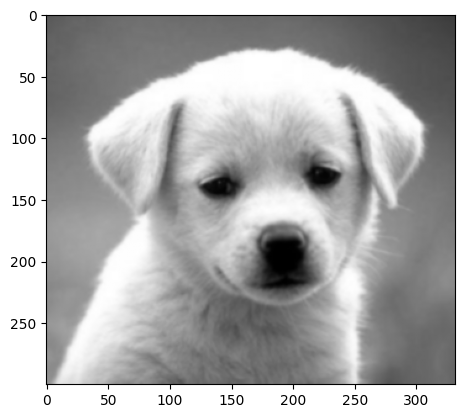

In [9]:
# 2. 가우시안 필터
k2 = np.array([
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0219, 0.0983, 0.1621, 0.0983, 0.0219],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030]
])

plt.imshow(conv(gray16,k2), cmap='gray')

화질이 뭉개져 부드러워진다

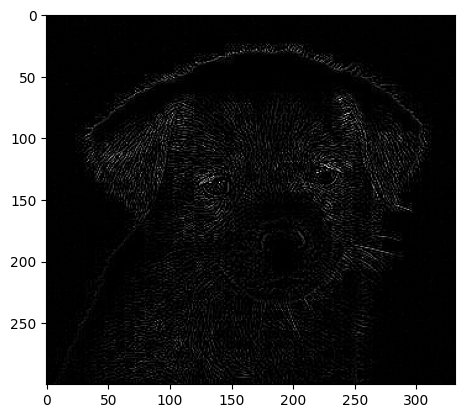

In [67]:
# 3. 라플라시안 필터, 이미지의 급격한 변화를 강조한다.
k3 = np.array([
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
])
plt.imshow(conv(gray16,k3), cmap='gray')

이미지의 급격한 변화를 강조하며, 엣지를 검출한다

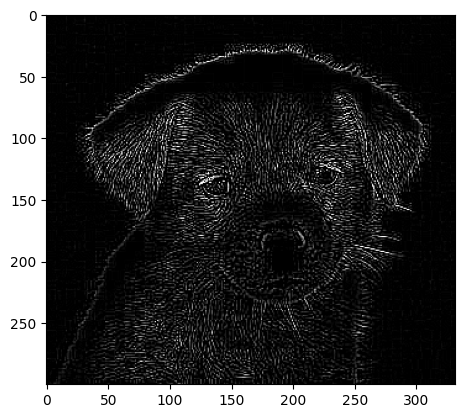

In [11]:
# 4.
k4 = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])
plt.imshow(conv(gray16,k4), cmap='gray')

더 강하게 엣지를 검출한다.

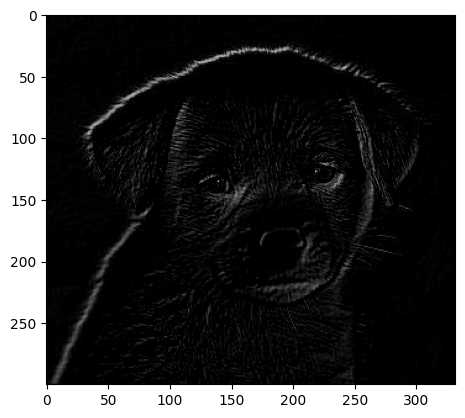

In [65]:
# 5.
k5 = np.array([
    [-1,  0,  0],
    [0,  0,  0],
    [0,  0,  1]
])
plt.imshow(conv(gray16,k5), cmap='gray')

대각선 방향의 엣지를 검출한다.

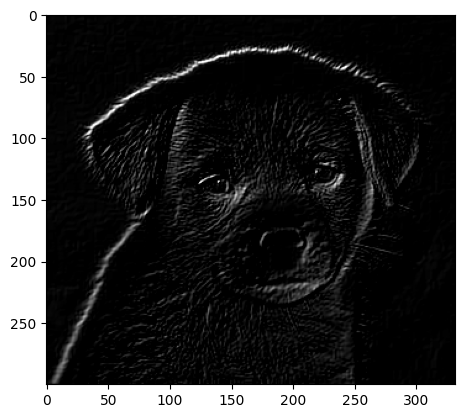

In [66]:
# 6.
k6 = np.array([
    [-1, -1, 0],
    [ -1,  0,  1],
    [ 0,  1,  1]
])

plt.imshow(conv(gray16,k6), cmap='gray')

대각선 방향의 엣지를 검출하며, 이전 마스크보다 더 강하게 검출한다.

# HW#2-4

In [69]:
school = cv.imread(DIR+"school.jpg")
gray =cv.cvtColor(school,cv.COLOR_BGR2GRAY)
gray16 = np.int16(gray)

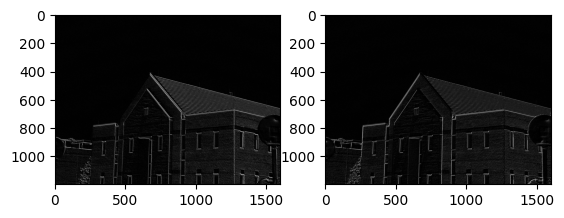

In [71]:
# 45도 Sobel 연산자
filter45 = np.array([
    [0, 1, 2],
    [ -1,  0,  1],
    [ -2,  -1,  0]
])
result = conv(gray16,filter45)
result = cv.convertScaleAbs(result) # 절댓값

plt.subplot(1,2,1)
plt.imshow(result, cmap='gray')


# -45도 Sobel 연산자
filter135 = np.array([
    [2, 1, 0],
    [ 1,  0,  -1],
    [ 0,  -1,  -2]
])
result = conv(gray16,filter135)
result = cv.convertScaleAbs(result) # 절댓값
plt.subplot(1,2,2)
plt.imshow(result, cmap='gray')

45, -45 방향으로 Sobel 연산자를 변형하여 적용한 결과 대각선 방향의 엣지가 검출된다

# HW#2-5

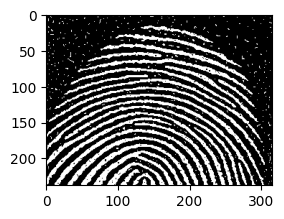

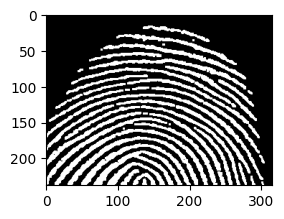

In [16]:
finger = cv.imread(DIR+"finger.jpg")
gray = cv.cvtColor(finger, cv.COLOR_BGR2GRAY)

bin_img = gray

# 적용할 구조요소, 3x3 사이즈의 점
se = np.uint8([[0,1,0],
              [1,1,1],
              [0,1,0]])

# 1. 침식으로 노이즈 제거
erosion = cv.erode(bin_img,se,iterations=1)

# 2. 팽창으로 원본 복원
# 침식 보다는 큰 3x3을 꽉 채운 구조요소 사용
se = np.uint8([[1,1,1],
              [1,1,1],
              [1,1,1]])

dilation = cv.dilate(erosion,se,iterations=1)

plt.subplot(1,2,1)
plt.imshow(bin_img, cmap='gray')
plt.show()

plt.subplot(1,2,2)
plt.imshow(dilation, cmap='gray')
plt.show()

적용 결과 침식을 통해 노이즈가 감소하고, 팽창으로 통해 원래 사이즈로의 복원과 사이의 구멍을 매워주었다.

# HW#2-6

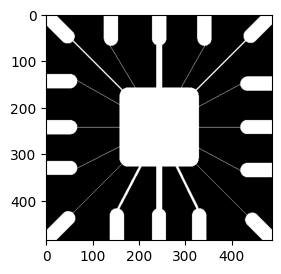

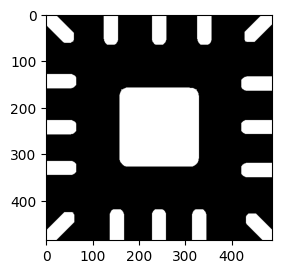

In [17]:
img = cv.imread(DIR+"Fig0905(a)(wirebond-mask).tif")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


# 적용할 구조요소, 15x15 사이즈
se = np.ones((15, 15), dtype=np.uint8)

# 1. 침식으로 노이즈 제거
erosion = cv.erode(gray,se,iterations=1)

# 2. 팽창
dilate = cv.dilate(erosion,se,iterations=1)

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.show()

plt.subplot(1,2,2)
plt.imshow(dilate, cmap='gray')
plt.show()

침식 이후 팽창, 즉 Opening 연산을 이용하여 선분을 제거하였다.

# HW#2-7

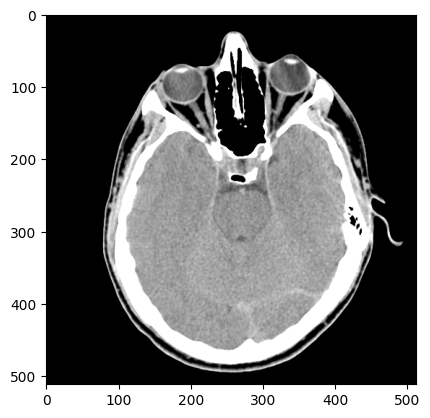

In [18]:
img = cv.imread(DIR+"/Fig0939(a)(headCT-Vandy).tif")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

Text(0.5, 1.0, 'Edge Strength')

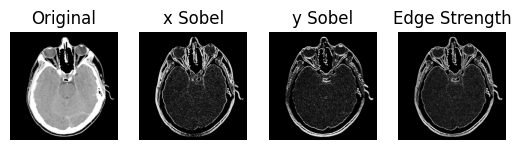

In [19]:
# 1. sobel
# Sobel 연산: x방향, y방향
grad_x = cv.Sobel(gray, cv.CV_32F, 1, 0, ksize=3)
grad_y = cv.Sobel(gray, cv.CV_32F, 0, 1, ksize=3)

# 절댓값 + uint8로 변환 (출력용)
sobel_x = cv.convertScaleAbs(grad_x)
sobel_y = cv.convertScaleAbs(grad_y)

# x, y 방향 엣지를 합쳐서 최종 엣지 강도 계산
edge_strength = cv.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

# 결과 출력
plt.subplot(1,4,1)
plt.axis('off')
plt.imshow(gray,cmap="gray")
plt.title("Original")

plt.subplot(1,4,2)
plt.axis('off')
plt.imshow(sobel_x,cmap="gray")
plt.title("x Sobel")

plt.subplot(1,4,3)
plt.axis('off')
plt.imshow(sobel_y,cmap="gray")
plt.title("y Sobel")

plt.subplot(1,4,4)
plt.axis('off')
plt.imshow(edge_strength,cmap="gray")
plt.title("Edge Strength")

Text(0.5, 1.0, 'Laplacian Edge Detection')

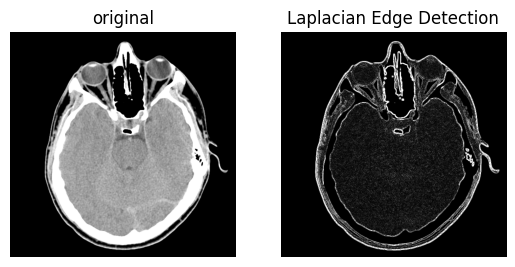

In [20]:
# 2. Laplacian
# 라플라시안 마스크
filter = np.array([
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]
], dtype=np.float32)

# 라플라시안 적용
laplacian = cv.filter2D(gray, ddepth=cv.CV_64F, kernel=filter)

# 절댓값 취하고 uint8로 변환
laplacian_abs = cv.convertScaleAbs(laplacian)

# 시각화
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(gray,cmap="gray")
plt.title("original")

plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(laplacian_abs,cmap="gray")
plt.title("Laplacian Edge Detection")

Text(0.5, 1.0, 'Tlow=150, Thigh=300')

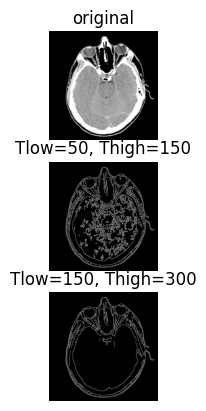

In [21]:
# 3. Canny
canny1 = cv.Canny(gray,50,150)
canny2 = cv.Canny(gray,150,300)

# 시각화
plt.subplot(3,1,1)
plt.axis('off')
plt.imshow(gray,cmap="gray")
plt.title("original")

plt.subplot(3,1,2)
plt.axis('off')
plt.imshow(canny1,cmap="gray")
plt.title("Tlow=50, Thigh=150")

plt.subplot(3,1,3)
plt.axis('off')
plt.imshow(canny2,cmap="gray")
plt.title("Tlow=150, Thigh=300")

Text(0.5, 1.0, 'Morphological Gradient')

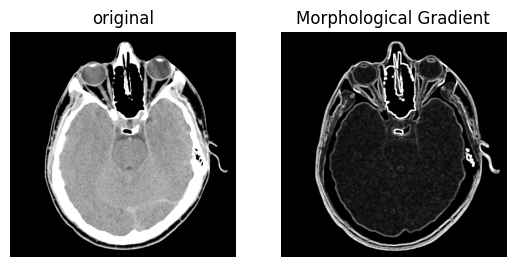

In [22]:
# 4. Morphological Gradient
# 팽창 연산과 침식 연산의 차 연산

# 구조 요소
se = np.uint8([[1,1,1,1],
               [1,1,1,1],
               [1,1,1,1],
               [1,1,1,1]])

# 팽창
dilation = cv.dilate(gray, se, iterations=1)

# 침식
erosion = cv.erode(gray, se, iterations=1)

# Morphological Gradient = 팽창 - 침식
morph_gradient = cv.subtract(dilation, erosion)

# 시각화
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(gray,cmap="gray")
plt.title("original")

plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(morph_gradient,cmap="gray")
plt.title("Morphological Gradient")

Text(0.5, 1.0, 'Morphological')

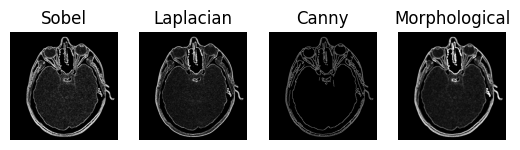

In [23]:
# 4가지 비교
plt.subplot(1,4,1)
plt.axis('off')
plt.imshow(edge_strength,cmap="gray")
plt.title("Sobel")

plt.subplot(1,4,2)
plt.axis('off')
plt.imshow(laplacian_abs,cmap="gray")
plt.title("Laplacian")

plt.subplot(1,4,3)
plt.axis('off')
plt.imshow(canny2,cmap="gray")
plt.title("Canny")

plt.subplot(1,4,4)
plt.axis('off')
plt.imshow(morph_gradient,cmap="gray")
plt.title("Morphological")

# 4가지 결과 분석

결과가 제일 깔끔하게 나온 방식은 Canny 방식이었으며, 제일 노이즈가 많게 나왔던 결과는 Sobel이었다. 대비가 가장 강한 방식은 Morphological Gradient 방식이었다. Canny 방식에서 Threshold를 이용하면 가장 좋은 edge ditection이 될 것으로 예상된다.

그러나 사용하는 마스크에 따라 결과가 달라질 수 있다.

# HW#2-8

In [24]:
img = cv.imread(DIR+"Fig0938(a)(cygnusloop_Xray_original).tif")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

(np.float64(-0.5), np.float64(565.5), np.float64(565.5), np.float64(-0.5))

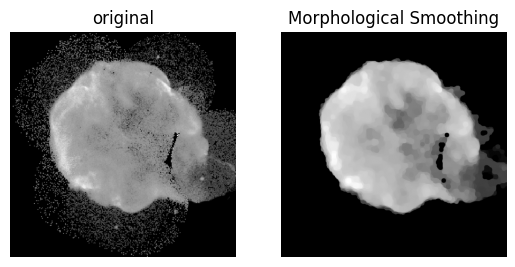

In [25]:
# Morphological Smoothing, 열림 연산 후 닫힘 연산 수행

# 구조 요소, 반지름 5의 원형 형태
se = np.array([
    [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
], dtype=np.uint8)

# 1. 열림 연산 = 침식 → 팽창
erosion = cv.erode(gray, se, iterations=1)
opening = cv.dilate(erosion, se, iterations=1)

# 2. 닫힘 연산 = 팽창 → 침식
dilation = cv.dilate(opening, se, iterations=1)
smoothing = cv.erode(dilation, se, iterations=1)

# 시각화
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("original")
plt.axis('off')


plt.subplot(1,2,2)
plt.imshow(smoothing, cmap='gray')
plt.title("Morphological Smoothing")
plt.axis('off')

(np.float64(-0.5), np.float64(565.5), np.float64(565.5), np.float64(-0.5))

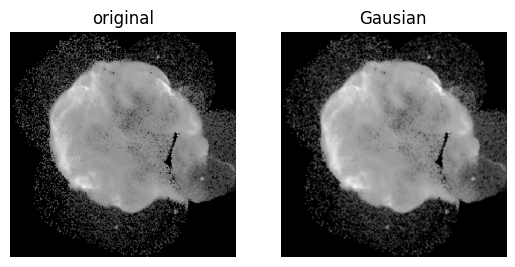

In [26]:
# Smoothing Filter 중 가우시안 사용
k = np.array([
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0219, 0.0983, 0.1621, 0.0983, 0.0219],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030]
])

# 시각화
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(conv(gray,k), cmap='gray')
plt.title("Gausian")
plt.axis('off')

노이즈를 확실히 제거하는 것은 Morphological Smoothing이 더 우수하나, 영상이 뭉개지는 단점이 있다. Gausian은 노이즈를 확실하게 제거하지는 못하지만 더 부드럽다.

# HW#2-9

(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

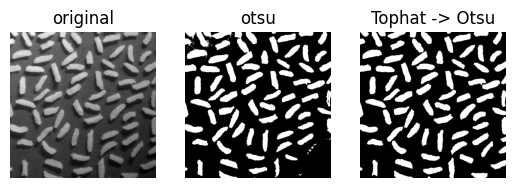

In [27]:
img = cv.imread(DIR+"Fig0940(a)(rice_image_with_intensity_gradient).tif")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

t, otsu = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# 반지름이 40인 원형 형태의 필터 생성
se = cv.getStructuringElement(cv.MORPH_ELLIPSE, (2*40 + 1, 2*40 + 1))

# Opening
eroded = cv.erode(gray, se)
opened = cv.dilate(eroded, se)

# Top-Hat: 원본 - opening
tophat = cv.subtract(gray, opened)

t, tophat_otsu = cv.threshold(tophat, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# 시각화
plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(otsu, cmap='gray')
plt.title("otsu")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(tophat_otsu, cmap='gray')
plt.title("Tophat -> Otsu")
plt.axis('off')

실행 결과 Otsu만 실행한 부분은 영상의 불균일한 배경에 의해 일부 쌀알이 보이지 않는다. 그러나 Tophat을 실시한 후 Otsu를 실시한 영상에서는 배경에 상관없이 균일하게 쌀알이 잘 추출된다


# HW#2-10

(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

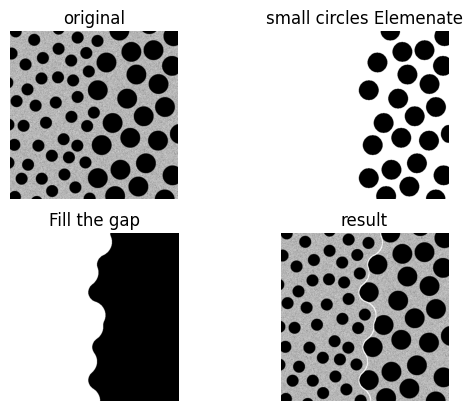

In [62]:
img = cv.imread(DIR+"Fig0943(a)(dark_blobs_on_light_background).tif")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 이진화
_, binary = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

plt.subplot(2,2,1)
plt.imshow(gray, cmap='gray')
plt.title("original")
plt.axis('off')


# Closing으로 어두운 부분 중 구조요소보다 작은것 제거

# 반지름이 25인 원형 형태의 필터 생성
se = cv.getStructuringElement(cv.MORPH_ELLIPSE, (2*25 + 1, 2*25 + 1))

dilation = cv.dilate(binary, se, iterations=1)
closing = cv.erode(dilation, se, iterations=1)

plt.subplot(2,2,2)
plt.imshow(closing, cmap='gray')
plt.title("small circles Elemenate")
plt.axis('off')

# Opening으로 어두운 부분의 중간을 매꾸기
# 반지름이 50인 원형 형태의 필터 생성
se = cv.getStructuringElement(cv.MORPH_ELLIPSE, (2*50 + 1, 2*50 + 1))
erosion = cv.erode(closing, se, iterations=1)
opening = cv.dilate(erosion, se, iterations=1)


plt.subplot(2,2,3)
plt.imshow(opening, cmap='gray')
plt.title("Fill the gap")
plt.axis('off')


# 경계 추출
se = np.uint8([[1,1,1,1],
               [1,1,1,1],
               [1,1,1,1],
               [1,1,1,1]])

# Morphological Gradient = 팽창 - 침식
dilation = cv.dilate(opening, se, iterations=1)
erosion = cv.erode(opening, se, iterations=1)
morph_gradient = cv.subtract(dilation, erosion)

# 추출된 경계를 원본에 더해서 시각화
result = cv.add(gray,morph_gradient)

plt.subplot(2,2,4)
plt.imshow(result, cmap='gray')
plt.title("result")
plt.axis('off')